# QSAR biodegradation Classification Using Decision Tree and Logistic Regression

## 1.0 Import & Reading Dataset

In [234]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [235]:
cd C:\Users\User\Downloads

C:\Users\User\Downloads


In [236]:
data = pd.read_csv('biodeg.csv', sep = ';')
data

,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,...,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,experimental_class
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,...,0,0,0,2.949,1.591,0,7.253,0,0,RB
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,...,0,0,0,3.315,1.967,0,7.257,0,0,RB
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,...,0,0,1,3.076,2.417,0,7.601,0,0,RB
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,...,0,0,1,3.046,5.000,0,6.690,0,0,RB
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,...,0,0,0,3.351,2.405,0,8.003,0,0,RB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,5.431,2.8955,0,0,0,2,0,32.1,4,1,...,0,6,1,3.573,2.242,1,8.088,0,0,NRB
1051,5.287,3.3732,0,0,9,0,0,35.3,0,9,...,0,3,0,3.787,3.083,3,9.278,0,0,NRB
1052,4.869,1.7670,0,1,9,0,5,44.4,0,4,...,4,13,0,3.848,2.576,5,9.537,1,0,NRB
1053,5.158,1.6914,2,0,36,0,9,56.1,0,0,...,1,16,0,5.808,2.055,8,11.055,0,1,NRB


## 2.0 Data Description

Attribute Information:
41 molecular descriptors and 1 experimental class:
1) SpMax_L: Leading eigenvalue from Laplace matrix

2) J_Dz(e): Balaban-like index from Barysz matrix weighted by Sanderson electronegativity

3) nHM: Number of heavy atoms

4) F01[N-N]: Frequency of N-N at topological distance 1

5) F04[C-N]: Frequency of C-N at topological distance 4

6) NssssC: Number of atoms of type ssssC

7) nCb-: Number of substituted benzene C(sp2)

8) C%: Percentage of C atoms

9) nCp: Number of terminal primary C(sp3)

10) nO: Number of oxygen atoms

11) F03[C-N]: Frequency of C-N at topological distance 3

12) SdssC: Sum of dssC E-states

13) HyWi_B(m): Hyper-Wiener-like index (log function) from Burden matrix weighted by mass

14) LOC: Lopping centric index

15) SM6_L: Spectral moment of order 6 from Laplace matrix

16) F03[C-O]: Frequency of C - O at topological distance 3

17) Me: Mean atomic Sanderson electronegativity (scaled on Carbon atom)

18) Mi: Mean first ionization potential (scaled on Carbon atom)

19) nN-N: Number of N hydrazines

20) nArNO2: Number of nitro groups (aromatic)

21) nCRX3: Number of CRX3

22) SpPosA_B(p): Normalized spectral positive sum from Burden matrix weighted by polarizability

23) nCIR: Number of circuits

24) B01[C-Br]: Presence/absence of C - Br at topological distance 1

25) B03[C-Cl]: Presence/absence of C - Cl at topological distance 3

26) N-073: Ar2NH / Ar3N / Ar2N-Al / R..N..R

27) SpMax_A: Leading eigenvalue from adjacency matrix (Lovasz-Pelikan index)

28) Psi_i_1d: Intrinsic state pseudoconnectivity index - type 1d

29) B04[C-Br]: Presence/absence of C - Br at topological distance 4

30) SdO: Sum of dO E-states

31) TI2_L: Second Mohar index from Laplace matrix

32) nCrt: Number of ring tertiary C(sp3)

33) C-026: R--CX--R

34) F02[C-N]: Frequency of C - N at topological distance 2

35) nHDon: Number of donor atoms for H-bonds (N and O)

36) SpMax_B(m): Leading eigenvalue from Burden matrix weighted by mass

37) Psi_i_A: Intrinsic state pseudoconnectivity index - type S average

38) nN: Number of Nitrogen atoms

39) SM6_B(m): Spectral moment of order 6 from Burden matrix weighted by mass

40) nArCOOR: Number of esters (aromatic)

41) nX: Number of halogen atoms

42) experimental class: ready biodegradable (RB) and not ready biodegradable (NRB)

In [237]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SpMax_L             1055 non-null   float64
 1   J_Dz(e)             1055 non-null   float64
 2   nHM                 1055 non-null   int64  
 3   F01[N-N]            1055 non-null   int64  
 4   F04[C-N]            1055 non-null   int64  
 5   NssssC              1055 non-null   int64  
 6   nCb-                1055 non-null   int64  
 7   C%                  1055 non-null   float64
 8   nCp                 1055 non-null   int64  
 9   nO                  1055 non-null   int64  
 10  F03[C-N]            1055 non-null   int64  
 11  SdssC               1055 non-null   float64
 12  HyWi_B(m)           1055 non-null   float64
 13  LOC                 1055 non-null   float64
 14  SM6_L               1055 non-null   float64
 15  F03[C-O]            1055 non-null   int64  
 16  Me    

In [238]:
#To check the number of nulls in the dataset
data.apply(lambda x: sum(x.isnull()), axis = 0)

SpMax_L               0
J_Dz(e)               0
nHM                   0
F01[N-N]              0
F04[C-N]              0
NssssC                0
nCb-                  0
C%                    0
nCp                   0
nO                    0
F03[C-N]              0
SdssC                 0
HyWi_B(m)             0
LOC                   0
SM6_L                 0
F03[C-O]              0
Me                    0
Mi                    0
nN-N                  0
nArNO2                0
nCRX3                 0
SpPosA_B(p)           0
nCIR                  0
B01[C-Br]             0
B03[C-Cl]             0
N-073                 0
SpMax_A               0
Psi_i_1d              0
B04[C-Br]             0
SdO                   0
TI2_L                 0
nCrt                  0
C-026                 0
F02[C-N]              0
nHDon                 0
SpMax_B(m)            0
Psi_i_A               0
nN                    0
SM6_B(m)              0
nArCOOR               0
nX                    0
experimental_cla

In [239]:
#Getting the summary of the numerical variables
data.describe()

,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,...,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX
count,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,...,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000
mean,4.782644,3.069508,0.716588,0.042654,0.980095,0.290047,1.646445,37.055640,1.376303,1.803791,...,0.129858,0.883412,1.274882,0.961137,3.918240,2.558417,0.686256,8.629492,0.051185,0.723223
std,0.546916,0.831308,1.462452,0.256010,2.332955,1.073771,2.224822,9.144466,1.963521,1.775435,...,0.644057,1.520467,2.273994,1.257013,0.999602,0.642765,1.090389,1.241986,0.318970,2.239286
min,2.000000,0.803900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.267000,1.467000,0.000000,4.917000,0.000000,0.000000
25%,4.481000,2.502750,0.000000,0.000000,0.000000,0.000000,0.000000,30.450000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.487500,2.103000,0.000000,7.991000,0.000000,0.000000
50%,4.828000,3.046300,0.000000,0.000000,0.000000,0.000000,1.000000,37.500000,1.000000,2.000000,...,0.000000,0.000000,0.000000,1.000000,3.726000,2.458000,0.000000,8.499000,0.000000,0.000000
75%,5.125000,3.437650,1.000000,0.000000,1.000000,0.000000,3.000000,43.400000,2.000000,3.000000,...,0.000000,1.000000,2.000000,2.000000,3.987000,2.870500,1.000000,9.020500,0.000000,0.000000
max,6.496000,9.177500,12.000000,3.000000,36.000000,13.000000,18.000000,60.700000,24.000000,12.000000,...,8.000000,12.000000,18.000000,7.000000,10.695000,5.825000,8.000000,14.700000,4.000000,27.000000


## 3.0 Data Analysis & Pre-processing

### 3.1 Pie Chart

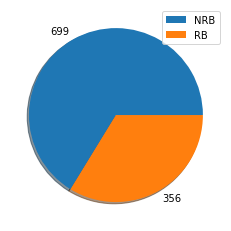

In [240]:
value = np.array(data['experimental_class'].value_counts())
label = ["NRB", "RB"]
plt.pie(value, labels = value, shadow = True)
plt.legend(label)
plt.show()

### 3.2 Univariate Selection
Univariate selection works by selecting the best features that have the strongest relationship with the output variable based on univariate statistical tests. It can be seen as a preprocessing step to an estimator.

In [241]:
#Inport SelectKBest class from scikit-learn
from sklearn.feature_selection import SelectKBest

#Import chi-squared (chi²) statistical test from scikit-learn
from sklearn.feature_selection import chi2

#Features
x = data.iloc[:, 0:41] 

#Target column/label --> i.e target
y = data.iloc[:, -1]

In [242]:
x

,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb-,C%,nCp,nO,...,nCrt,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,...,0,0,0,0,2.949,1.591,0,7.253,0,0
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,...,0,0,0,0,3.315,1.967,0,7.257,0,0
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,...,0,0,0,1,3.076,2.417,0,7.601,0,0
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,...,0,0,0,1,3.046,5.000,0,6.690,0,0
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,...,0,0,0,0,3.351,2.405,0,8.003,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,5.431,2.8955,0,0,0,2,0,32.1,4,1,...,2,0,6,1,3.573,2.242,1,8.088,0,0
1051,5.287,3.3732,0,0,9,0,0,35.3,0,9,...,0,0,3,0,3.787,3.083,3,9.278,0,0
1052,4.869,1.7670,0,1,9,0,5,44.4,0,4,...,0,4,13,0,3.848,2.576,5,9.537,1,0
1053,5.158,1.6914,2,0,36,0,9,56.1,0,0,...,0,1,16,0,5.808,2.055,8,11.055,0,1


In [243]:
y

0        RB
1        RB
2        RB
3        RB
4        RB
       ... 
1050    NRB
1051    NRB
1052    NRB
1053    NRB
1054    NRB
Name: experimental_class, Length: 1055, dtype: object

In [244]:
#Standardize/normalize the data
sc = MinMaxScaler()
x_transform = sc.fit_transform(x)
x_transform

array([[0.42682384, 0.2253511 , 0.        , ..., 0.23878156, 0.        ,
        0.        ],
       [0.48265125, 0.15650377, 0.        , ..., 0.23919043, 0.        ,
        0.        ],
       [0.4297153 , 0.29226378, 0.        , ..., 0.27435347, 0.        ,
        0.        ],
       ...,
       [0.63812278, 0.11501624, 0.        , ..., 0.47224778, 0.25      ,
        0.        ],
       [0.70240214, 0.10598787, 0.16666667, ..., 0.6274149 , 0.        ,
        0.03703704],
       [0.6841637 , 0.22151763, 0.16666667, ..., 0.430645  , 0.        ,
        0.07407407]])

In [245]:
#Standardize/normalize the data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_transform = le.fit_transform(y)
y_transform

array([1, 1, 1, ..., 0, 0, 0])

In [246]:
#Apply SelectKBest class to extract top 25 best features from the dataset
bestfeatures = SelectKBest(score_func = chi2, k = 25).fit(x_transform, y_transform)
data_scores = pd.DataFrame(bestfeatures.scores_)
data_columns = pd.DataFrame(x.columns)

#Concat two dataframes for better visualization
featureScores = pd.concat([data_columns, data_scores], axis = 1)

#naming the dataframe columns
featureScores.columns = ['Features', 'Scores']
featureScores

,Features,Scores
0,SpMax_L,3.954494
1,J_Dz(e),0.000139
2,nHM,23.453453
3,F01[N-N],5.759613
4,F04[C-N],8.949639
5,NssssC,9.363627
6,nCb-,20.024476
7,C%,1.592611
8,nCp,0.387754
9,nO,4.818680


In [247]:
#Print top 25 best features
print(featureScores.nlargest(25, 'Scores'))

       Features     Scores
24    B03[C-Cl]  57.136847
2           nHM  23.453453
32        C-026  23.323628
6          nCb-  20.024476
33     F02[C-N]  17.170290
37           nN  15.638763
23    B01[C-Br]  13.293217
40           nX  12.450359
39      nArCOOR  11.707978
19       nArNO2  11.305833
10     F03[C-N]   9.508120
5        NssssC   9.363627
4      F04[C-N]   8.949639
28    B04[C-Br]   8.862145
13          LOC   8.140295
35   SpMax_B(m)   6.347671
38     SM6_B(m)   6.022534
3      F01[N-N]   5.759613
12    HyWi_B(m)   5.290188
20        nCRX3   5.262756
9            nO   4.818680
31         nCrt   4.781513
21  SpPosA_B(p)   4.649573
0       SpMax_L   3.954494
25        N-073   3.770609


In [248]:
x_transform_select = bestfeatures.transform(x_transform)
x_transform_select

array([[0.42682384, 0.        , 0.        , ..., 0.23878156, 0.        ,
        0.        ],
       [0.48265125, 0.        , 0.        , ..., 0.23919043, 0.        ,
        0.        ],
       [0.4297153 , 0.        , 0.        , ..., 0.27435347, 0.        ,
        0.        ],
       ...,
       [0.63812278, 0.        , 0.33333333, ..., 0.47224778, 0.25      ,
        0.        ],
       [0.70240214, 0.16666667, 0.        , ..., 0.6274149 , 0.        ,
        0.03703704],
       [0.6841637 , 0.16666667, 0.        , ..., 0.430645  , 0.        ,
        0.07407407]])

In [249]:
#Split the dataset into training, testing and validation sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_transform_select, y_transform, test_size = 0.2, random_state = 0 )
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 0)
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(675, 25)
(211, 25)
(169, 25)


## 4.0 Hyperparameter Tuning

### 4.1 GridSearchCV

In [250]:
# Select a set of parameters that gives optimal result
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

eta0 = np.arange(0.01, 1, 0.01)
depths = np.arange(5, 20, 1)
min_split = np.arange(2, 8, 1)
max_iter = np.arange(100, 500, 50)

model_params = {
    'decision_tree': {
        'model': DecisionTreeClassifier(random_state = 0),
        'params' : {
            'max_depth' : depths
              , 'criterion' : ['gini', 'entropy']
              , 'max_features' : ['auto', 'sqrt', 'log2']
              , 'min_samples_split' : min_split
        }  
    },

    'logistic_regression' : {
        'model': SGDClassifier(random_state = 0),
        'params': {
            'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 
                     'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
            'penalty': ['l2', 'l1', 'elasticnet'],
            'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
            'eta0': eta0
            
        }
    }
}

In [251]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv = 5, return_train_score = False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        #'best_index': clf.best_index_
    })
    
df = pd.DataFrame(scores,columns=['model', 'best_score', 'best_params'])

In [252]:
df

,model,best_score,best_params
0,decision_tree,0.829630,"{'criterion': 'entropy', 'max_depth': 10, 'max..."
1,logistic_regression,0.872593,"{'eta0': 0.31, 'learning_rate': 'adaptive', 'l..."


In [253]:
print(df['best_params'][0])
print(df['best_params'][1])

{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'min_samples_split': 5}
{'eta0': 0.31, 'learning_rate': 'adaptive', 'loss': 'modified_huber', 'penalty': 'elasticnet'}


In [254]:
print(str(df['model'][0]) + ': ' + str(df['best_score'][0]))
print(str(df['model'][1]) + ': ' + str(df['best_score'][1]))

decision_tree: 0.8296296296296296
logistic_regression: 0.8725925925925926


## 5.0 Model Evaluation

### 5.1 Desicion Tree

In [255]:
# Build model

dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, max_features = 'auto',
                       min_samples_split = 5, random_state = 0)

dt_model.fit(x_train, y_train)

#start prediction
y_pred = dt_model.predict(x_val)

In [256]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report

# print results
print('Accuracy Score: ' + str(accuracy_score(y_val, y_pred)))
print('Recall Score: ' + str(recall_score(y_val, y_pred)))
print('Precision Score: ' + str(precision_score(y_val, y_pred)))
print('F1 Score: ' + str(f1_score(y_val, y_pred)))
print('\n' + 'Confusion Matrix: \n' + str(confusion_matrix(y_val, y_pred)))
print('\n' + 'Classification Report: \n' + str(classification_report(y_val, y_pred)))

Accuracy Score: 0.7869822485207101
Recall Score: 0.6833333333333333
Precision Score: 0.7068965517241379
F1 Score: 0.6949152542372882

Confusion Matrix: 
[[92 17]
 [19 41]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       109
           1       0.71      0.68      0.69        60

    accuracy                           0.79       169
   macro avg       0.77      0.76      0.77       169
weighted avg       0.79      0.79      0.79       169



### 5.2 Logistic Regression

In [257]:
# build model
from sklearn.linear_model import SGDClassifier
model_logr = SGDClassifier(loss = 'modified_huber', eta0 = 0.31, learning_rate ='adaptive', penalty = 'elasticnet', 
                           max_iter = 200, random_state = 0)
model_logr.fit(x_train, y_train)

# start prediction
y_pred = model_logr.predict(x_val)

In [258]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report

# print results
print('Accuracy Score: ' + str(accuracy_score(y_val, y_pred)))
print('Recall Score: ' + str(recall_score(y_val, y_pred)))
print('Precision Score: ' + str(precision_score(y_val, y_pred)))
print('F1 Score: ' + str(f1_score(y_val, y_pred)))
print('\n' + 'Confusion Matrix: \n' + str(confusion_matrix(y_val, y_pred)))
print('\n' + 'Classification Report: \n' + str(classification_report(y_val, y_pred)))

Accuracy Score: 0.8106508875739645
Recall Score: 0.7
Precision Score: 0.75
F1 Score: 0.7241379310344827

Confusion Matrix: 
[[95 14]
 [18 42]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       109
           1       0.75      0.70      0.72        60

    accuracy                           0.81       169
   macro avg       0.80      0.79      0.79       169
weighted avg       0.81      0.81      0.81       169



## 6.0 Predictions

### 6.1 Decision Tree

In [259]:
y_pred_dt = dt_model.predict(x_test)

In [260]:
# print results
print('Accuracy Score: ' + str(accuracy_score(y_test, y_pred_dt)))
print('Recall Score: ' + str(recall_score(y_test, y_pred_dt)))
print('Precision Score: ' + str(precision_score(y_test, y_pred_dt)))
print('F1 Score: ' + str(f1_score(y_test, y_pred_dt)))
print('\n' + 'Confusion Matrix: \n' + str(confusion_matrix(y_test, y_pred_dt)))
print('\n' + 'Classification Report: \n' + str(classification_report(y_test, y_pred_dt)))

Accuracy Score: 0.7962085308056872
Recall Score: 0.5932203389830508
Precision Score: 0.6481481481481481
F1 Score: 0.6194690265486725

Confusion Matrix: 
[[133  19]
 [ 24  35]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       152
           1       0.65      0.59      0.62        59

    accuracy                           0.80       211
   macro avg       0.75      0.73      0.74       211
weighted avg       0.79      0.80      0.79       211



### 6.2 Logistic Regression

In [261]:
y_pred_logr = model_logr.predict(x_test)

In [262]:
# print results
print('Accuracy Score: ' + str(accuracy_score(y_test, y_pred_logr)))
print('Recall Score: ' + str(recall_score(y_test, y_pred_logr)))
print('Precision Score: ' + str(precision_score(y_test, y_pred_logr)))
print('F1 Score: ' + str(f1_score(y_test, y_pred_logr)))
print('\n' + 'Confusion Matrix: \n' + str(confusion_matrix(y_test, y_pred_logr)))
print('\n' + 'Classification Report: \n' + str(classification_report(y_test, y_pred_logr)))

Accuracy Score: 0.8293838862559242
Recall Score: 0.8305084745762712
Precision Score: 0.6533333333333333
F1 Score: 0.7313432835820896

Confusion Matrix: 
[[126  26]
 [ 10  49]]

Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       152
           1       0.65      0.83      0.73        59

    accuracy                           0.83       211
   macro avg       0.79      0.83      0.80       211
weighted avg       0.85      0.83      0.83       211



## 7.0 Conclusion
In conclusion, the best suited machine learning model for QSAR biodegradation classification is Logistic Regression